In [1]:
import numpy as np
import cv2 as cv
import tensorflow as tf

In [7]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [11]:
for i in range(0,6):
    random_num=np.random.randint(0,len(X_train))
    img=X_train[random_num]
    window_name="Random Sample #"+str(i)
    cv.imshow(window_name,img)
    cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
img_rows=X_train[0].shape[0]
img_cols=X_train[1].shape[0]

X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

input_shape=(img_rows,img_cols,1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train/=255
X_test/=255

print('X_train shape',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

X_train shape (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

print('no of classes:',str(y_train.shape[1]))
num_classes=y_test.shape[1]
num_pixles=y_train.shape[1] * X_train.shape[1]

no of classes: 10


In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

In [23]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [28]:
#train

In [32]:
batch_size=32
epochs=10

history=model.fit(X_train,y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_test,y_test))

score=model.evaluate(X_test,y_test,verbose=0)
print("Test loss",score[0])
print("Test accuracy",score[1])

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3102 - accuracy: 0.9052 - val_loss: 0.1562 - val_accuracy: 0.9510
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2459 - accuracy: 0.9251 - val_loss: 0.1272 - val_accuracy: 0.9613
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2000 - accuracy: 0.9397 - val_loss: 0.0986 - val_accuracy: 0.9697
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1622 - accuracy: 0.9510 - val_loss: 0.0804 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1374 - accuracy: 0.9589 - val_loss: 0.0650 - val_accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1234 - accuracy: 0.9637 - val_loss: 0.0586 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1088 - accuracy: 0.9675 - val_loss: 0.0512 -

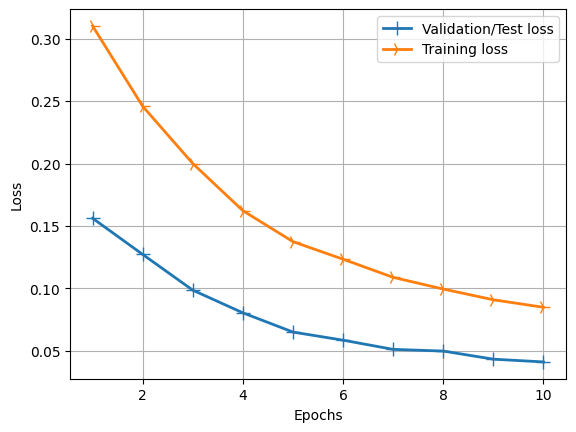

In [33]:
import matplotlib.pyplot as plt
history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

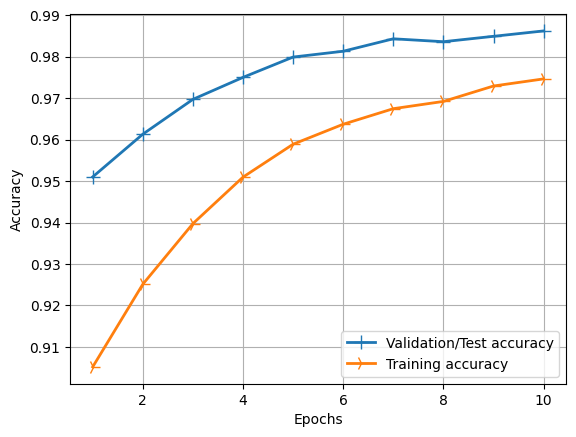

In [37]:
history_dict=history.history
acc_values=history_dict['accuracy']
val_acc_vals=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_acc_vals,label='Validation/Test accuracy')
line2=plt.plot(epochs,acc_values,label='Training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
def draw_test(name, pred, input_im):
    BLACK = [0, 0, 0]
    expanded_image = cv.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv.cvtColor(expanded_image, cv.COLOR_GRAY2BGR)
    cv.putText(expanded_image, str(pred), (152, 70), cv.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
    cv.imshow(name, expanded_image)

for i in range(0, 10):
    rand = np.random.randint(0, len(X_test))
    input_im = X_test[rand]
    imageL = cv.resize(input_im, None, fx=4, fy=4, interpolation=cv.INTER_CUBIC)
    pred_prob = model.predict(np.expand_dims(input_im, axis=0))[0]
    pred_class = np.argmax(pred_prob)
    draw_test("prediction", pred_class, imageL)
    cv.waitKey(0)

cv.destroyAllWindows()


1/1 [==============================] - 0s 16ms/step


In [59]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

try:
    # Plot the model and save it to a file
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    
    # Load the saved image and display it
    img = plt.imread('model_plot.png')
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # Remove axis
    plt.show()
except Exception as e:
    print("Error:", e)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Error: [Errno 2] No such file or directory: 'model_plot.png'
